## Business Goal 

#### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### <font color='blue'>Importing Required Libraries</font>

In [1]:
import pandas as pd
pd.set_option("display.max_columns", 500)
import numpy as np
from numpy.random import seed
from numpy.random import randn
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
# import StatsModel.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

### <font color='blue'>Importing Required Dataset</font>

In [2]:
main_df = pd.read_csv("train.csv")
main_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### <font color='blue'>Sanity Checkup</font>

In [3]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
main_df.shape

(1460, 81)

In [5]:
main_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
main_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### <font color='blue'>Handling Missing Values Checkup</font>


#### <font color='green'>Visualizing Null Percentage</font>

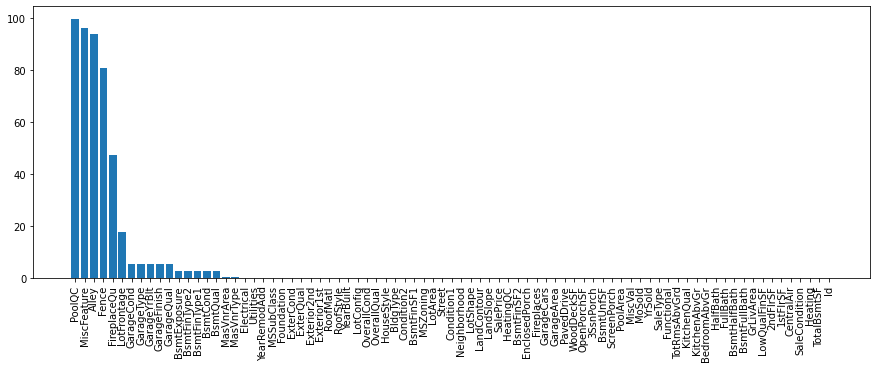

In [7]:
null_vals = round(main_df.isnull().sum()/len(main_df)*100,2)
null_vals.sort_values(inplace=True, ascending=False)
null_vals = pd.DataFrame(null_vals)
null_vals.columns = ['count']
null_vals['Name'] = null_vals.index

plt.figure(figsize= (15,5))
plt.bar(null_vals["Name"], null_vals["count"] )
plt.xticks(rotation = 90)
plt.show()

### <font color='blue'>Imputing missing values In Categorical Data</font>

In [8]:
main_df["PoolQC"].fillna("No Pool", inplace = True)
main_df["Alley"].fillna("No Alley Access", inplace = True)
main_df["Fence"].fillna("No Fence", inplace = True)
main_df["FireplaceQu"].fillna("No Fireplace", inplace = True)
main_df["GarageType"].fillna("No Garage", inplace = True)
main_df["GarageCond"].fillna("No Garage", inplace = True)
main_df["GarageFinish"].fillna("No Garage", inplace = True)
main_df["GarageQual"].fillna("No Garage", inplace = True)
main_df["BsmtFinType1"].fillna("No Basement", inplace = True)
main_df["BsmtFinType2"].fillna("No Basement", inplace = True)
main_df["BsmtExposure"].fillna("No Basement", inplace = True)
main_df["BsmtQual"].fillna("No Basement", inplace = True)
main_df["BsmtCond"].fillna("No Basement", inplace = True)

In [9]:
main_df["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [10]:
main_df["Electrical"].isnull().sum()

1

In [11]:
main_df["Electrical"].fillna(main_df["Electrical"].mode()[0], inplace = True)

In [12]:
main_df["MasVnrType"].value_counts() 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
main_df["MasVnrType"].isnull().sum()

8

In [14]:
main_df["MasVnrType"].fillna(main_df["MasVnrType"].mode()[0], inplace = True)

#### <font color='blue'>Imputing Missing Values Of Numerical Variables According To Their Distribution</font>

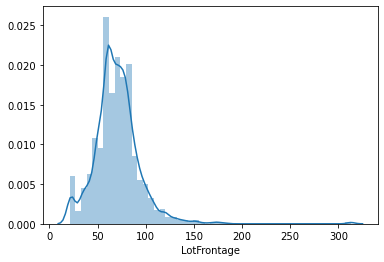

In [15]:
sns.distplot(main_df["LotFrontage"])
plt.show()

In [16]:
main_df["LotFrontage"].isnull().sum()

259

In [17]:
main_df['LotFrontage'].mean()

70.04995836802665

In [18]:
main_df["LotFrontage"].fillna(main_df["LotFrontage"].mean(), inplace = True)
main_df["LotFrontage"].isnull().sum()

0

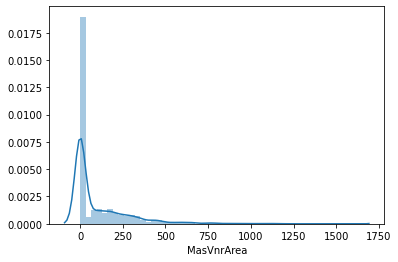

In [19]:
sns.distplot(main_df["MasVnrArea"])
plt.show()

In [20]:
main_df["MasVnrArea"].isnull().sum()

8

In [21]:
main_df['MasVnrArea'].median()

0.0

In [22]:
main_df["MasVnrArea"].fillna(main_df["MasVnrArea"].median(), inplace = True)
main_df["MasVnrArea"].isnull().sum()

0

In [23]:
main_df["GarageYrBlt"].fillna(int(2020), inplace = True)
main_df["GarageYrBlt"].isnull().sum()

0

#### <font color='blue'>Dropping "MiscFeature" As It Have 99% Of Null Values</font>

In [24]:
main_df.drop(["MiscFeature"], axis = 1, inplace = True)

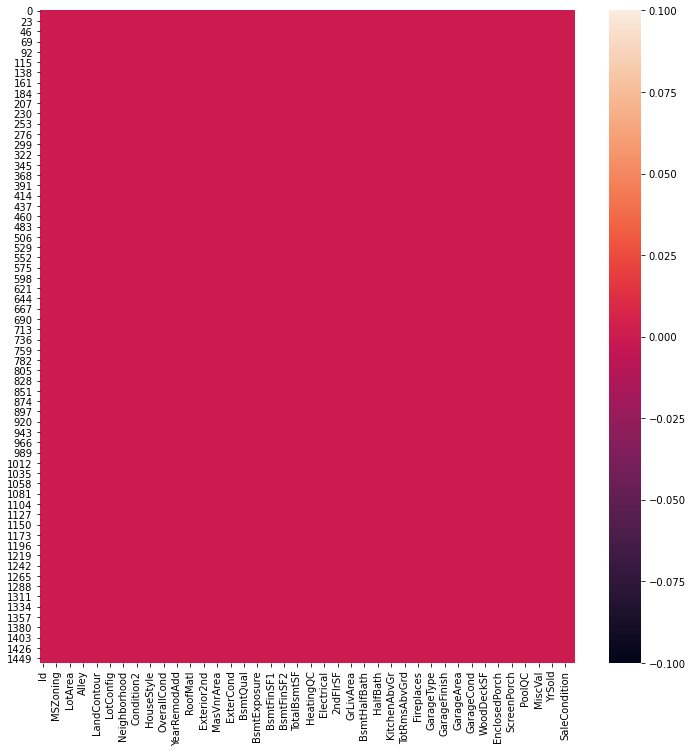

In [25]:
plt.figure(figsize = (12,12))
sns.heatmap(main_df.isnull())
plt.show()

### <font color='blue'>EDA</font>



### <font color='green'>Converting Year Columns To Age Columns</font>


In [26]:
year_lis = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"]
for k in year_lis:
    main_df[k] = (2020 - main_df[k])

### <font color='blue'>Transforming Target Variable As It Have High Skewness</font>

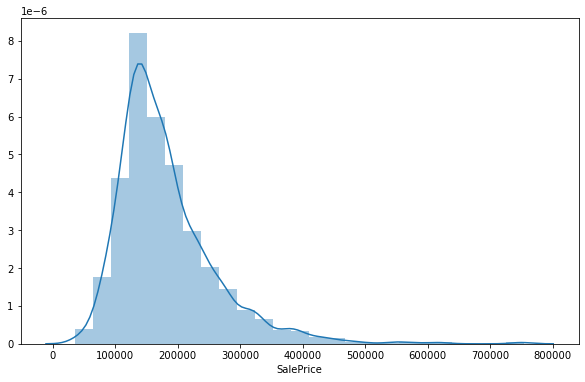

In [27]:
plt.figure(figsize = (10,6))
sns.distplot(main_df["SalePrice"], bins = 25)
plt.show()

In [28]:
main_df["SalePrice"].skew()

1.8828757597682129

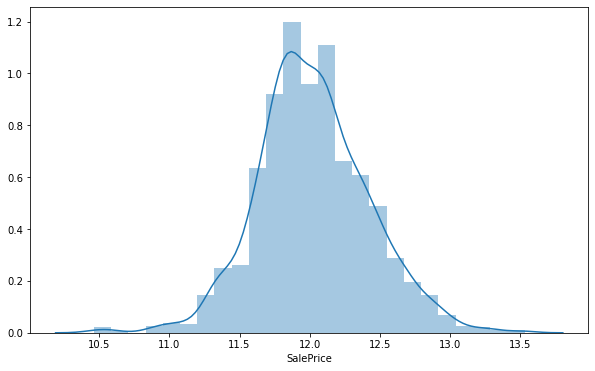

In [29]:
main_df["SalePrice"] = np.log1p(main_df["SalePrice"])
plt.figure(figsize = (10,6))
sns.distplot(main_df["SalePrice"], bins = 25)
plt.show()

In [30]:
main_df["SalePrice"].skew()

0.12134661989685333

In [31]:
main_df_num = main_df.select_dtypes(include=['float64', 'int64'])

Initially Dropping these columns from num_list due to their descrete values

In [32]:
main_df_num.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                                   'MoSold', 'YrSold'], axis=1, inplace = True)

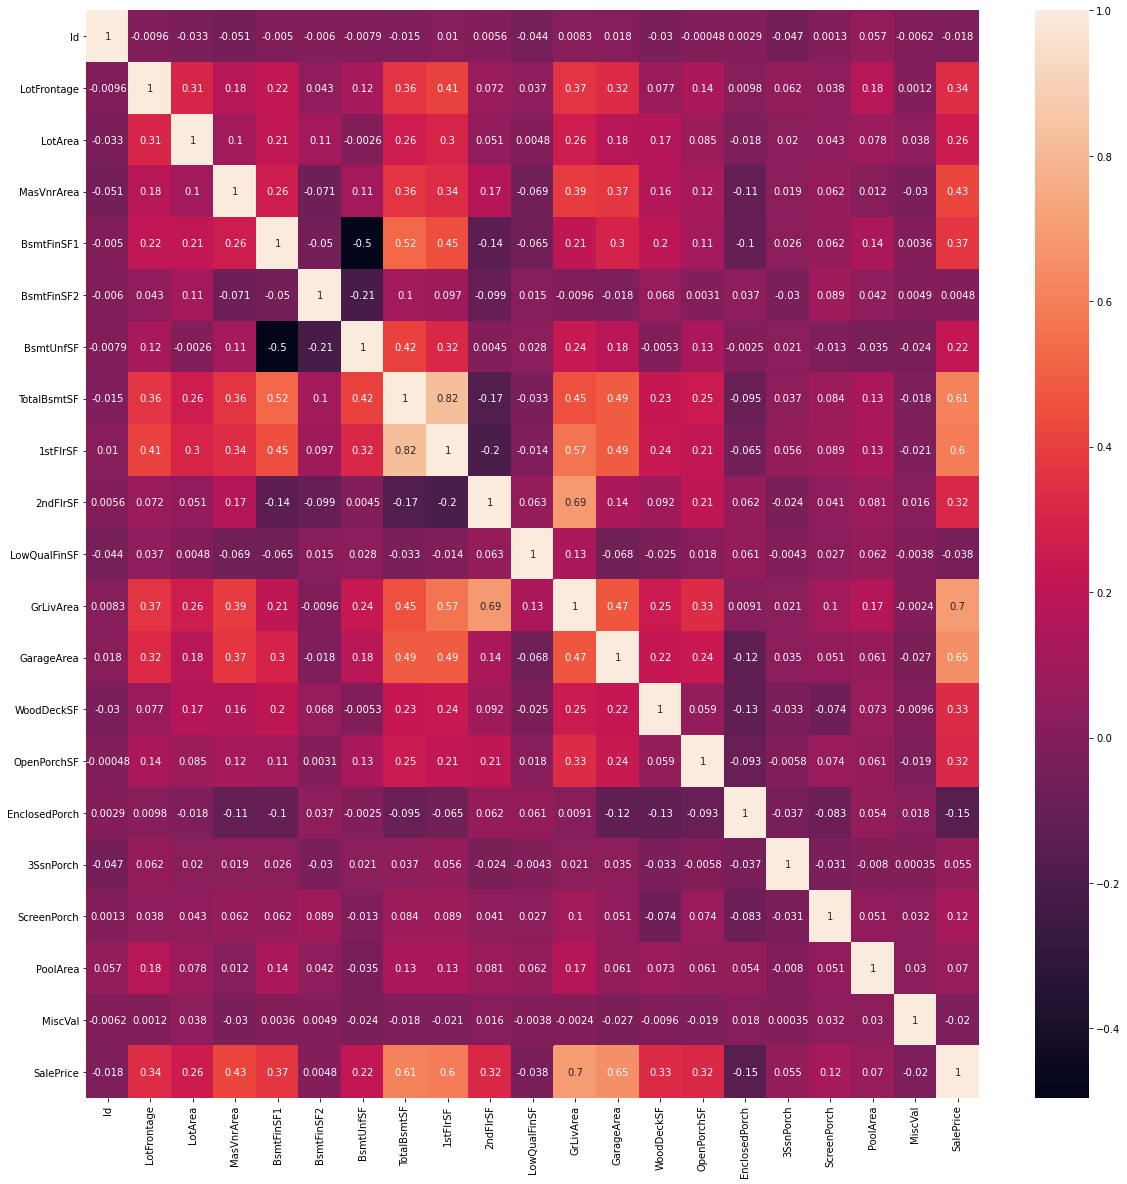

In [33]:
plt.figure(figsize = (20,20))
sns.heatmap(main_df_num.corr(), annot = True)
plt.show()

### <font color='blue'>Plotting Some Features Having Higher Correlation Against Target Variable To See Pattern</font>

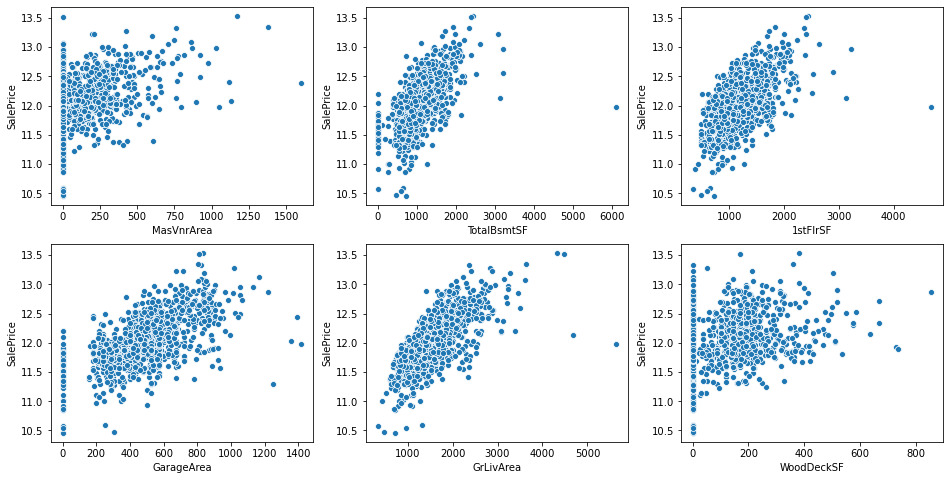

In [34]:
correl_var = ["MasVnrArea", "TotalBsmtSF", "1stFlrSF", "GarageArea", "GrLivArea", "WoodDeckSF"]
plt.figure(figsize=(16,8))
for j in correl_var:
    plt.subplot(2,3,correl_var.index(j)+1)
    sns.scatterplot(x = j, y = 'SalePrice', data = main_df)
plt.show()

### <font color='blue'>Analysing The Variance Of Datas In Categorical Variables</font>

In [35]:
cat_vars = list(main_df.select_dtypes(np.object).head().columns)
# cat_vars

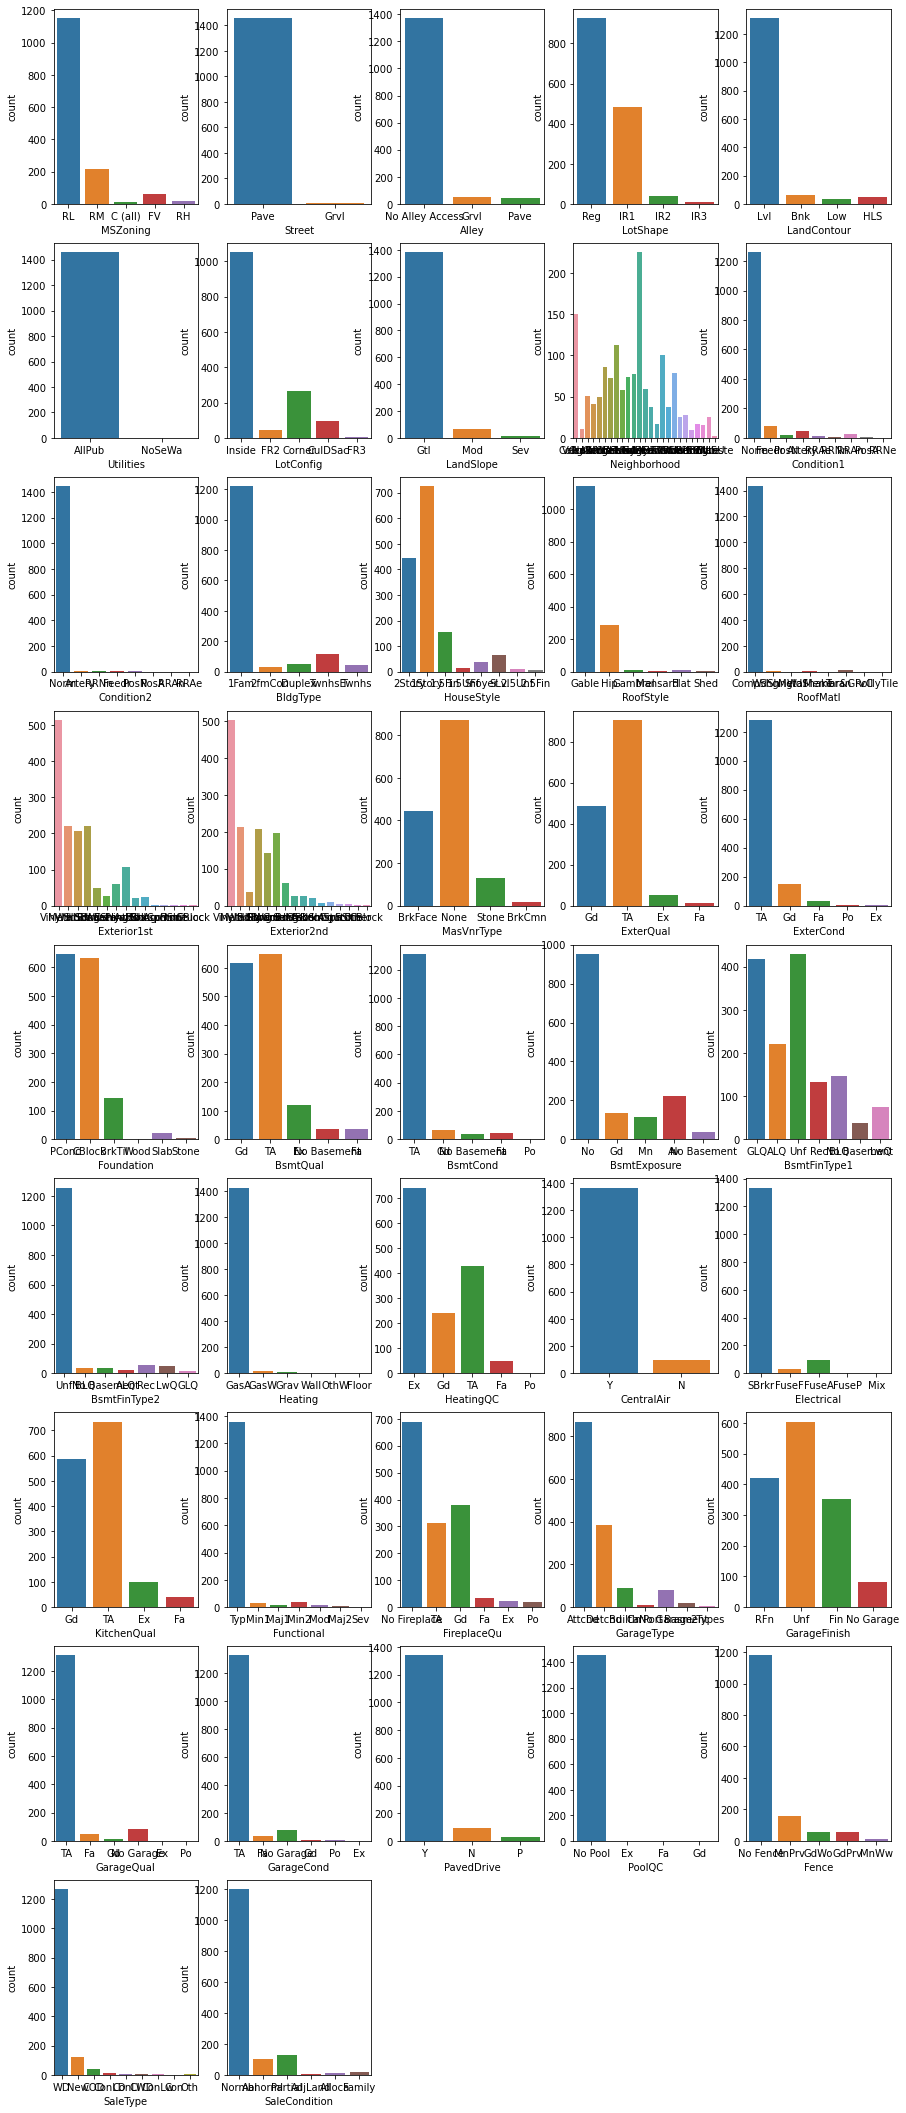

In [36]:
plt.figure(figsize = (15,38))
for i in cat_vars:
    plt.subplot(9,5, cat_vars.index(i)+1)
    sns.countplot(main_df[i])
plt.show()

### <font color='blue'>Rename The Values Of Categorical Variables For Proper Variation </font>

In [37]:
main_df["LandContour"] = main_df["LandContour"].replace(['Bnk', 'HLS', 'Low'],'other LandContour')

main_df["LotConfig"] = main_df["LotConfig"].replace(['FR2', 'FR3'] ,'FR 2,3')

main_df["LandSlope"] = main_df["LandSlope"].replace(['Mod', 'Sev'],"Hig")

main_df["Condition1"] = main_df["Condition1"].replace(['Feedr', 'Artery', 'RRAn', 'PosN', 'RRAe', 'PosA', 'RRNn', 'RRNe'], 'other-cond1')

main_df["Condition2"] = main_df["Condition2"].replace(['Feedr', 'PosN', 'Artery', 'RRNn', 'RRAn', 'PosA', 'RRAe'], "others-cond-2")

main_df["RoofStyle"] = main_df["RoofStyle"].replace(['Flat', 'Gambrel', 'Mansard', 'Shed'], 'others RoofStyle')

main_df["RoofMatl"] = main_df["RoofMatl"].replace(['Tar&Grv', 'WdShngl', 'WdShake', 'Metal', 'Roll', 'Membran', 'ClyTile'], "other RoofMatl")

main_df["Exterior1st"] = main_df["Exterior1st"].replace(['BrkComm', 'Stone', 'ImStucc', 'CBlock', 'AsphShn'], "other Exterior1")

main_df["Exterior2nd"] = main_df["Exterior2nd"].replace(['Brk Comn', 'Stone', 'AsphShn', 'Other', 'CBlock'] ,"other Exterior2")

main_df["ExterCond"] = main_df["ExterCond"].replace({"Ex" :"Gd",  'Po':"Fa"})

main_df["Foundation"] = main_df["Foundation"].replace({"Wood" :"Wood,Stone",  'Stone':"Wood,Stone"})

main_df["BsmtCond"] = main_df["BsmtCond"].replace({"Po" :"Fa"})

main_df["Heating"] = main_df["Heating"].replace(['GasW', 'Grav', 'Wall', 'OthW', 'Floor'], "Other Heating place")

main_df["HeatingQC"] = main_df["HeatingQC"].replace({"Po" :"Fa"})

main_df["Electrical"] = main_df["Electrical"].replace(['FuseP', 'Mix'],'mix/poor-Elec.')

main_df["Functional"] = main_df["Functional"].replace("Sev","Maj2")

main_df["SaleType"] = main_df["SaleType"].replace(['ConLD', 'ConLI', 'ConLw', 'CWD', 'Con'], "Contract Type Sale")

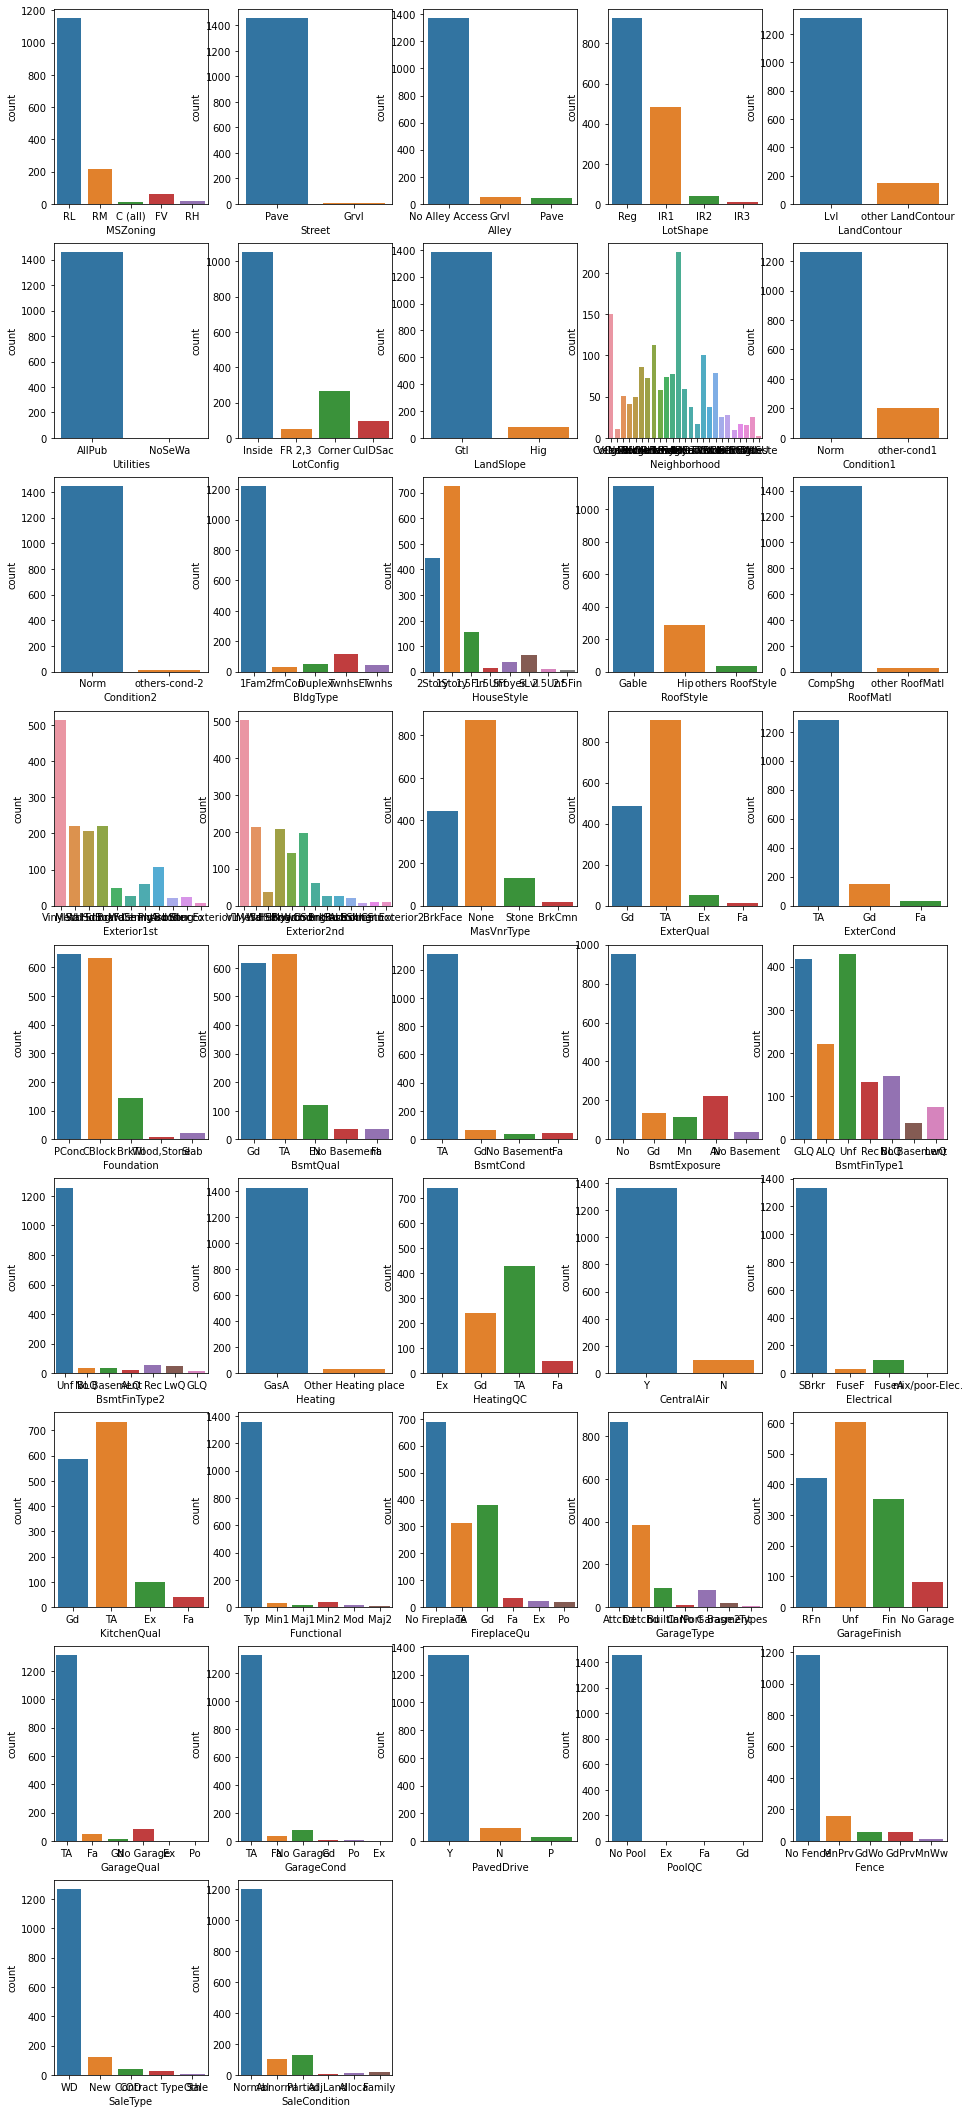

In [38]:
plt.figure(figsize = (16,38))
for i in cat_vars:
    plt.subplot(9,5, cat_vars.index(i)+1)
    sns.countplot(main_df[i])
plt.show()

### <font color='blue'>Maping values of Categorical Variables Having Two Unique Values </font>

In [39]:
varlist1 =  ['Street']
def binary_map(x):
    return x.map({'Pave': 1, "Grvl": 0})
main_df[varlist1] = main_df[varlist1].apply(binary_map)

varlist2 =  ['LandContour']
def binary_map(x):
    return x.map({'Lvl': 1, "other LandContour": 0})
main_df[varlist2] = main_df[varlist2].apply(binary_map)


varlist3 =  ['LandSlope']
def binary_map(x):
    return x.map({'Gtl': 1, "Hig": 0})
main_df[varlist3] = main_df[varlist3].apply(binary_map)

varlist4 =  ['Condition1']
def binary_map(x):
    return x.map({'Norm': 1, "other-cond1": 0})
main_df[varlist4] = main_df[varlist4].apply(binary_map)

varlist5 =  ['Condition2']
def binary_map(x):
    return x.map({'Norm': 1, "others-cond-2": 0})
main_df[varlist5] = main_df[varlist5].apply(binary_map)
                                            
                                            
varlist6 =  ['RoofMatl']
def binary_map(x):
    return x.map({'CompShg': 1, "other RoofMatl": 0})
main_df[varlist6] = main_df[varlist6].apply(binary_map)
                                            
varlist7 =  ['Heating']
def binary_map(x):
    return x.map({'GasA': 1, "Other Heating place": 0})
main_df[varlist7] = main_df[varlist7].apply(binary_map)
                                            
varlist8 =  ['CentralAir']
def binary_map(x):
    return x.map({'Y': 1, "N": 0})
main_df[varlist8] = main_df[varlist8].apply(binary_map)

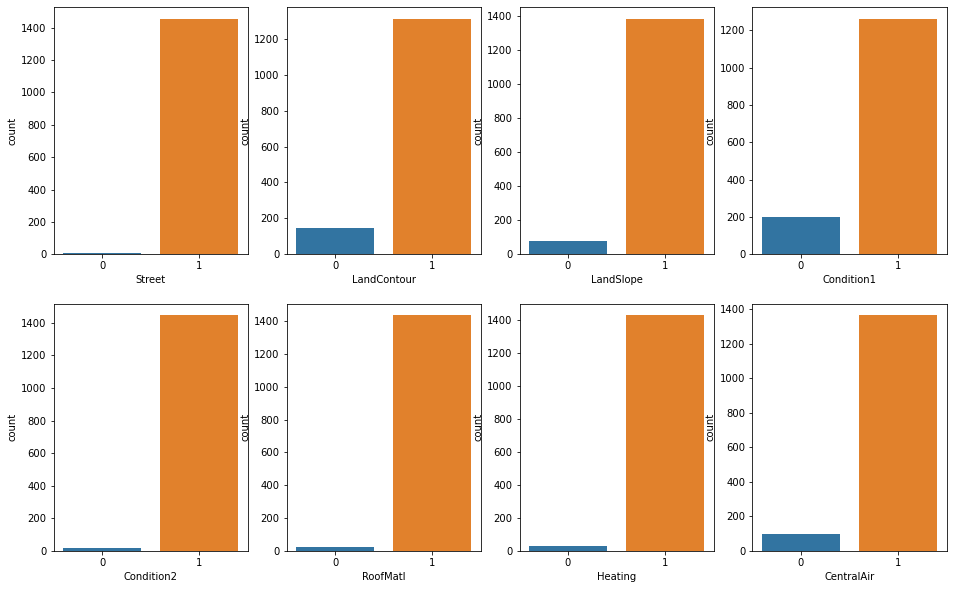

In [40]:
varlist = ["Street", "LandContour", "LandSlope", "Condition1", "Condition2", "RoofMatl", "Heating", "CentralAir"]
plt.figure(figsize= (16,10))
for v in varlist:
    plt.subplot(2,4,varlist.index(v)+1)
    sns.countplot(main_df[v]) 
plt.show()

#### <font color='blue'>Converting Ordinal Categorical Values to Numeric values By Using LabelEncoder </font>

In [41]:
lbl = LabelEncoder() 

lbl.fit(list(main_df["OverallQual"].values)) 
main_df["OverallQual"] = lbl.transform(list(main_df["OverallQual"].values))

lbl.fit(list(main_df["ExterCond"].values)) 
main_df["ExterCond"] = lbl.transform(list(main_df["ExterCond"].values))

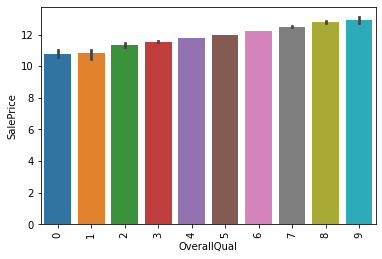

In [42]:
sns.barplot(x = 'OverallQual', y = "SalePrice", data = main_df)
plt.xticks(rotation = 90)
plt.show()

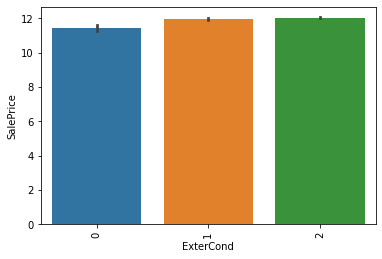

In [43]:
sns.barplot(x = 'ExterCond', y = "SalePrice", data = main_df)
plt.xticks(rotation = 90)
plt.show()

### <font color='blue'>Converting Numerical variables To Categorical Variables Having Descrete Values </font>

In [44]:
main_df['MSSubClass'] = main_df['MSSubClass'].astype('object')
main_df['OverallQual'] = main_df['OverallQual'].astype('object')
main_df['OverallCond'] = main_df['OverallCond'].astype('object')
main_df['BsmtFullBath'] = main_df['BsmtFullBath'].astype('object')
main_df['BsmtHalfBath'] = main_df['BsmtHalfBath'].astype('object')
main_df['FullBath'] = main_df['FullBath'].astype('object')
main_df['HalfBath'] = main_df['HalfBath'].astype('object')
main_df['BedroomAbvGr'] = main_df['BedroomAbvGr'].astype('object')
main_df['KitchenAbvGr'] = main_df['KitchenAbvGr'].astype('object')
main_df['TotRmsAbvGrd'] = main_df['TotRmsAbvGrd'].astype('object')
main_df['Fireplaces'] = main_df['Fireplaces'].astype('object')
main_df['GarageCars'] = main_df['GarageCars'].astype('object')

### <font color='blue'>Visualizing Numerical Variables Againist Target variable  </font>

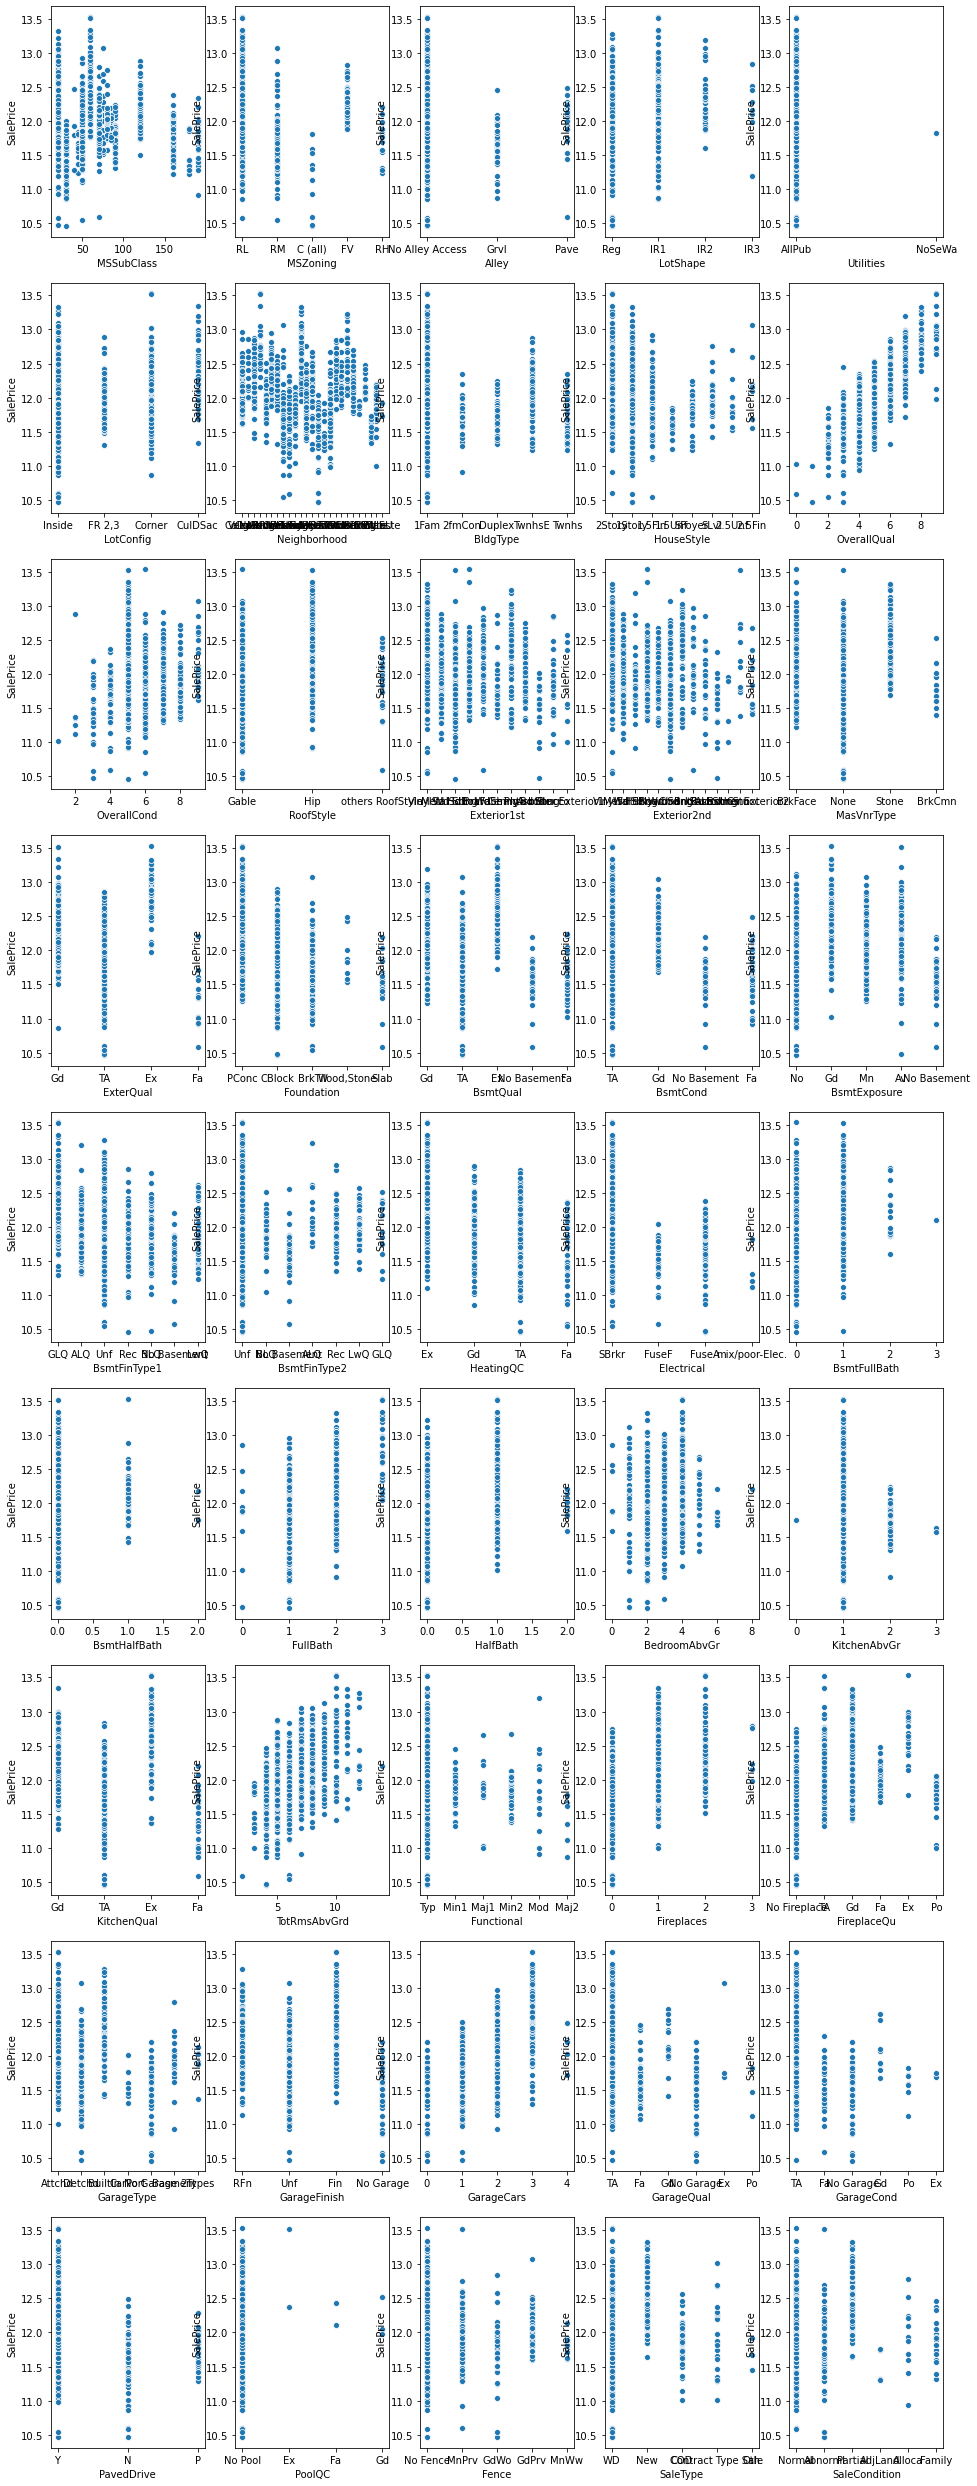

In [45]:
num_vars = list(main_df.select_dtypes(np.object, np.float64).head().columns)
# num_vars
plt.figure(figsize = (16,50))
for j in num_vars:
    plt.subplot(10,5, num_vars.index(j)+1)
    sns.scatterplot(x = j, y = "SalePrice", data = main_df)
plt.show()

### <font color='blue'>Creating Dummy Variables For Categorical Variables Using One Hot Encoding</font>

In [46]:
main_df_catg = main_df.select_dtypes(include=['object'])
main_df_dummy = pd.get_dummies(main_df_catg, drop_first=True)
main_df = main_df.drop(list(main_df_catg.columns), axis=1)
main_df = pd.concat([main_df, main_df_dummy], axis=1)
main_df.head()

,Id,LotFrontage,LotArea,Street,LandContour,LandSlope,Condition1,Condition2,YearBuilt,YearRemodAdd,RoofMatl,MasVnrArea,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley Access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,Utilities_NoSeWa,LotConfig_CulDSac,"LotConfig_FR 2,3",LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Hip,RoofStyle_others RoofStyle,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_other Exterior1,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_other Exterior2,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,"Foundation_Wood,Stone",BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,Electrical_FuseF,Electrical_SBrkr,Electrical_mix/poor-Elec.,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,GarageQual_Fa,GarageQual_Gd,GarageQual_No Garage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_No Garage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_No Pool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_No Fe

<font color='green'>Dropping "Id" Column As It Is Unrequired  </font>

In [47]:
main_df.drop(["Id"], axis = 1, inplace = True)

### <font color='blue'>Model Evaluation And Prediction </font>

In [48]:
# Assigning Copy Of Dataset For Easy Analysis
house = main_df.copy()

###  <font color='blue'>Splitting Model Into Train And Test Data Set</font>

In [49]:
main_cols = list(house.columns)
scaler = StandardScaler()
house = scaler.fit_transform(house)
house = pd.DataFrame(house)
house.columns = main_cols
y = house.loc[:, 'SalePrice']
X = house.loc[:, house.columns != 'SalePrice']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

### <font color='blue'>Feature Elimination Using RFE </font>

In [50]:
lm = LinearRegression()
# Selecting features using RFE 
rfe = RFE(lm, 100)             
rfe = rfe.fit(X_train, y_train)
cols = X_train.columns[rfe.support_]
X_train = X_train[cols]

### <font color='blue'>Lasso </font>

### <font color='green'>Cross validation Using Lasso By  r2 score </font>

In [51]:
model_l= Lasso()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
params= {"alpha":[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model_cv1 = GridSearchCV(estimator = model_l, param_grid= params, scoring ="r2",cv = folds, return_train_score= True, verbose= 1)
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [52]:
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.119432,0.023964,0.002365,0.001781,0.0001,{'alpha': 0.0001},0.895381,0.680491,-0.025470,0.889068,0.830735,0.654041,0.348465,5,0.905803,0.915636,0.911507,0.905944,0.918724,0.911523,0.005150
1,0.055817,0.003941,0.002487,0.000991,0.001,{'alpha': 0.001},0.891763,0.687217,0.113195,0.900685,0.833863,0.685345,0.296107,4,0.902254,0.913699,0.909098,0.902654,0.917307,0.909002,0.005948
2,0.016477,0.003257,0.001990,0.000616,0.01,{'alpha': 0.01},0.862668,0.710152,0.879872,0.887422,0.843469,0.836716,0.065071,1,0.887786,0.906215,0.885751,0.884070,0.896438,0.892052,0.008264
3,0.007828,0.001638,0.003789,0.001931,0.05,{'alpha': 0.05},0.841341,0.659314,0.853872,0.821792,0.821099,0.799484,0.071166,2,0.832746,0.858746,0.832286,0.833223,0.841019,0.839604,0.010097
4,0.006680,0.001248,0.003650,0.001118,0.1,{'alpha': 0.1},0.780222,0.615357,0.796155,0.747835,0.754491,0.738812,0.064143,3,0.753660,0.798573,0.755178,0.765195,0.761182,0.766758,0.016440


<font color='green'>Visualizing Alpha Vs R2 Score </font>

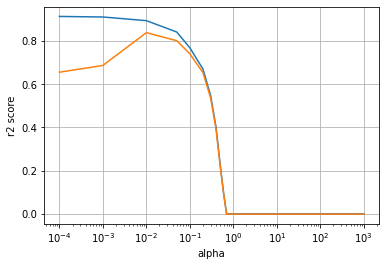

In [53]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.grid()
plt.show()

<font color='green'>From The above Graph we can clearly visualize that the best alpha parameter is 0.001  </font>

In [54]:
model_l = Lasso(alpha=0.001)
model_l.fit(X_train, y_train)
cols1 = X_train.columns
X_test  = X_test[cols]
# predict
print("alpha=0.001")
y_train_pred = model_l.predict(X_train)
print("R2_score Train:- {}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print("mean_squared_error Train:- {}".format(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))))
y_test_pred1 = model_l.predict(X_test)
final_predictions1 = np.exp(y_test_pred1)
print("\n")
print("R2_score Test:- {}".format(r2_score(y_true=y_test, y_pred=y_test_pred1)))
print("mean_squared_error Test:- {}".format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred1))))

alpha=0.001
R2_score Train:- 0.9043156662904792
mean_squared_error Train:- 0.29616358570966766


R2_score Test:- 0.8892122930150111
mean_squared_error Test:- 0.3623670514399393


#### <font color='blue'>Create The Dataframe Contains Variables Significant In Predicting Price and How Well Those Variables Describing The Price Of House</font>
<font color='green'>Features -> Variables, Coefficients -> How Wel Those Variables Describing Price</font>

In [55]:
# lasso model parameters
model_parameters = list(model_l.coef_)
model_parameters.insert(0, model_l.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_list = list(zip(cols, model_parameters))
lasso_data = pd.DataFrame(lasso_list)
lasso_data.columns = ['Features','Coefficients']
lasso_data.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
11,MasVnrArea,0.681
98,OverallQual_3,0.605
10,RoofMatl,0.266
34,MSSubClass_30,0.150
35,MSSubClass_40,0.128
...,...,...
2,LotArea,-0.062
38,MSSubClass_60,-0.077
81,Neighborhood_Somerst,-0.079
97,OverallQual_2,-0.110


#### <font color='blue'>Predicting Model By changeing The Value of  Hyperparameter To It's Double</font>

In [56]:
model_l = Lasso(alpha=0.002)
model_l.fit(X_train, y_train)
cols1 = X_train.columns
# predict
print("alpha=0.002")
y_train_pred = model_l.predict(X_train)
print("R2_score Train:- {}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print("mean_squared_error Train:- {}".format(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))))
y_test_pred1 = model_l.predict(X_test)
final_predictions1 = np.exp(y_test_pred1)
print("\n")
print("R2_score Test:- {}".format(r2_score(y_true=y_test, y_pred=y_test_pred1)))
print("mean_squared_error Test:- {}".format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred1))))

alpha=0.002
R2_score Train:- 0.9024663992684179
mean_squared_error Train:- 0.29901182926616765


R2_score Test:- 0.8881895439949559
mean_squared_error Test:- 0.36403582475936574


#### <font color='blue'>Create The Dataframe Contains Variables Significant In Predicting Price and How Well Those Variables Describing The Price Of House</font>
<font color='green'>Features -> Variables, Coefficients -> How Wel Those Variables Describing Price</font>

In [57]:
# lasso model parameters
model_parameters = list(model_l.coef_)
model_parameters.insert(0, model_l.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_list = list(zip(cols, model_parameters))
lasso_data = pd.DataFrame(lasso_list)
lasso_data.columns = ['Features','Coefficients']
lasso_data.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
11,MasVnrArea,0.545
98,OverallQual_3,0.484
10,RoofMatl,0.268
34,MSSubClass_30,0.117
35,MSSubClass_40,0.110
...,...,...
2,LotArea,-0.063
38,MSSubClass_60,-0.078
81,Neighborhood_Somerst,-0.091
97,OverallQual_2,-0.094


### <font color='blue'>Ridge</font>

### <font color='green'>Cross validation Using Ridge By r2 score</font>

In [58]:
model_r= Ridge()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
params= {"alpha":[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
model_cv3 = GridSearchCV(estimator = model_r, param_grid= params, scoring ="r2",cv = folds, return_train_score= True, verbose= 1)
model_cv3.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [59]:
cv_results = pd.DataFrame(model_cv3.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008301,0.005074,0.002139,0.001337,0.0001,{'alpha': 0.0001},0.895539,0.680239,0.538945,0.888221,0.832361,0.767061,0.137859,28,0.905920,0.915728,0.911633,0.906052,0.918765,0.911620,0.005127
1,0.006283,0.000898,0.003209,0.001344,0.001,{'alpha': 0.001},0.895538,0.680240,0.539010,0.888229,0.832362,0.767076,0.137838,27,0.905920,0.915728,0.911633,0.906052,0.918765,0.911620,0.005127
2,0.007004,0.002134,0.002358,0.001722,0.01,{'alpha': 0.01},0.895526,0.680250,0.539664,0.888310,0.832370,0.767224,0.137634,26,0.905920,0.915728,0.911633,0.906052,0.918765,0.911619,0.005127
3,0.006614,0.000759,0.002795,0.000717,0.05,{'alpha': 0.05},0.895471,0.680294,0.542554,0.888661,0.832410,0.767878,0.136729,25,0.905916,0.915727,0.911630,0.906049,0.918764,0.911617,0.005128
4,0.006016,0.001068,0.002120,0.001927,0.1,{'alpha': 0.1},0.895396,0.680347,0.546135,0.889076,0.832461,0.768683,0.135609,24,0.905907,0.915722,0.911624,0.906042,0.918760,0.911611,0.005130


<font color='green'>Visualizing Alpha Vs R2 Score </font>

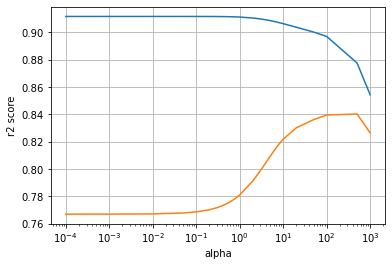

In [60]:
# plot
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.grid()
plt.show()

<font color='green'>From The above Graph we can clearly visualize that the best alpha parameters is 100 </font>

In [62]:
model_r = Ridge(alpha= 100)
model_r.fit(X_train, y_train)
# predict
print("alpha=100")
y_train_pred = model_r.predict(X_train)
print("R2_score Train:- {}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print("mean_squared_error Train:- {}".format(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))))
y_test_pred2 = model_r.predict(X_test)
final_predictions2 = np.exp(y_test_pred2)
print("\n")
print("R2_score Test:- {}".format(r2_score(y_true=y_test, y_pred=y_test_pred2)))
print("mean_squared_error Test:- {}".format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred2))))

alpha=100
R2_score Train:- 0.8933023831614468
mean_squared_error Train:- 0.31274372214231466


R2_score Test:- 0.8826856627398886
mean_squared_error Test:- 0.37288804604005216


#### <font color='blue'>Create The Dataframe Contains Variables Significant In Predicting Price and How Well Those Variables Describing The Price Of House </font>
<font color='green'>Features -> Variables, Coefficients -> How Wel Those Variables Describing Price</font>

In [63]:
# Ridge model parameters
model_parameters = list(model_r.coef_)
model_parameters.insert(0, model_r.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ridge_list = list(zip(cols, model_parameters))
ridge_data = pd.DataFrame(ridge_list)
ridge_data.columns = ['Features','Coefficients']
ridge_data.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
10,RoofMatl,0.121
35,MSSubClass_40,0.093
34,MSSubClass_30,0.093
7,Condition2,0.093
85,BldgType_2fmCon,0.078
...,...,...
31,MiscVal,-0.055
30,PoolArea,-0.057
38,MSSubClass_60,-0.069
2,LotArea,-0.070


#### <font color='blue'>Predicting Model By changeing The Value of  Hyperparameter To It's Double</font>

In [64]:
model_r = Ridge(alpha= 200)
model_r.fit(X_train, y_train)
# predict
print("alpha=200")
y_train_pred = model_r.predict(X_train)
print("R2_score Train:- {}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print("mean_squared_error Train:- {}".format(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))))
y_test_pred2 = model_r.predict(X_test)
final_predictions2 = np.exp(y_test_pred2)
print("\n")
print("R2_score Test:- {}".format(r2_score(y_true=y_test, y_pred=y_test_pred2)))
print("mean_squared_error Test:- {}".format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred2))))

alpha=200
R2_score Train:- 0.889256990025463
mean_squared_error Train:- 0.3186173364290593


R2_score Test:- 0.877385893023061
mean_squared_error Test:- 0.3812177686738577


#### <font color='blue'>Create The Dataframe Contains Variables Significant In Predicting Price and How Well Those Variables Describing The Price Of House</font>
<font color='green'>Features -> Variables, Coefficients -> How Wel Those Variables Describing Price</font>

In [65]:
# Ridge model parameters
model_parameters = list(model_r.coef_)
model_parameters.insert(0, model_r.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
ridge_list = list(zip(cols, model_parameters))
ridge_data = pd.DataFrame(ridge_list)
ridge_data.columns = ['Features','Coefficients']
ridge_data.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
10,RoofMatl,0.110
35,MSSubClass_40,0.085
34,MSSubClass_30,0.084
7,Condition2,0.083
85,BldgType_2fmCon,0.076
...,...,...
31,MiscVal,-0.054
83,Neighborhood_Timber,-0.055
38,MSSubClass_60,-0.065
2,LotArea,-0.075


### <font color='blue'>Checking Model Accuracy By dropping The Top Five Features Of Model Predicted By Lasso </font>

In [66]:
main_df.drop(["MasVnrArea", "OverallQual_3", "RoofMatl", "MSSubClass_30", "MSSubClass_40"], axis = 1, inplace = True)

In [67]:
house2 = main_df.copy()

In [68]:
main_cols = list(house2.columns)
scaler = StandardScaler()
house2 = scaler.fit_transform(house2)
house2 = pd.DataFrame(house2)
house2.columns = main_cols
y = house2.loc[:, 'SalePrice']
X = house2.loc[:, house2.columns != 'SalePrice']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [69]:
lm = LinearRegression()
# Selecting features using RFE 
rfe = RFE(lm, 100)             
rfe = rfe.fit(X_train, y_train)
cols = X_train.columns[rfe.support_]
X_train = X_train[cols]

In [70]:
model_l= Lasso()
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
params= {"alpha":[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
model_cv1 = GridSearchCV(estimator = model_l, param_grid= params, scoring ="r2",cv = folds, return_train_score= True, verbose= 1)
model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [71]:
cv_results = pd.DataFrame(model_cv1.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.112462,0.029566,0.004039,0.006078,0.0001,{'alpha': 0.0001},0.894038,0.710383,0.091369,0.886935,0.846450,0.685835,0.304493,5,0.909086,0.916685,0.914990,0.908305,0.920976,0.914008,0.004763
1,0.066776,0.009577,0.006073,0.004976,0.001,{'alpha': 0.001},0.891743,0.713342,0.234987,0.902463,0.847258,0.717959,0.250697,4,0.906443,0.915746,0.912177,0.906130,0.918532,0.911806,0.004937
2,0.027114,0.005793,0.003260,0.002394,0.01,{'alpha': 0.01},0.864190,0.701826,0.880614,0.887981,0.845081,0.835939,0.068662,1,0.886609,0.905864,0.886653,0.883905,0.894445,0.891495,0.008001
3,0.010995,0.001757,0.003650,0.001991,0.05,{'alpha': 0.05},0.841373,0.642256,0.854920,0.823338,0.817364,0.795850,0.077937,2,0.831450,0.859476,0.830172,0.832623,0.838080,0.838360,0.010897
4,0.008913,0.002170,0.002954,0.001566,0.1,{'alpha': 0.1},0.794032,0.620247,0.804937,0.749926,0.748199,0.743468,0.065701,3,0.756780,0.802846,0.759672,0.766935,0.763949,0.770036,0.016771


In [72]:
model_l = Lasso(alpha=0.001)
model_l.fit(X_train, y_train)
cols1 = X_train.columns
X_test  = X_test[cols]
# predict
print("alpha=0.001")
y_train_pred = model_l.predict(X_train)
print("R2_score Train:- {}".format(r2_score(y_true=y_train, y_pred=y_train_pred)))
print("mean_squared_error Train:- {}".format(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred))))
y_test_pred1 = model_l.predict(X_test)
final_predictions1 = np.exp(y_test_pred1)
print("\n")
print("R2_score Test:- {}".format(r2_score(y_true=y_test, y_pred=y_test_pred1)))
print("mean_squared_error Test:- {}".format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred1))))

alpha=0.001
R2_score Train:- 0.9073821951263865
mean_squared_error Train:- 0.2913791572122192


R2_score Test:- 0.8901732567139611
mean_squared_error Test:- 0.3607920572645604


#### <font color='blue'>Create The Dataframe Contains Variables Significant In Predicting Price and How Well Those Variables Describing The Price Of House </font> 
<font color='green'>Features -> Variables, Coefficients -> How Wel Those Variables Describing Price</font>

In [73]:
# lasso model parameters
model_parameters = list(model_l.coef_)
model_parameters.insert(0, model_l.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_list = list(zip(cols, model_parameters))
lasso_data = pd.DataFrame(lasso_list)
lasso_data.columns = ['Features','Coefficients']
lasso_data.sort_values(by='Coefficients',ascending=False)

,Features,Coefficients
13,BsmtUnfSF,0.632
98,OverallQual_8,0.567
11,BsmtFinSF1,0.257
33,MSSubClass_50,0.130
32,MSSubClass_45,0.099
...,...,...
94,OverallQual_4,-0.094
97,OverallQual_7,-0.094
48,Alley_No Alley Access,-0.101
91,HouseStyle_SLvl,-0.134
